In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [10]:
#loading data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
data = pd.read_csv('cleaned_efData.csv')

# Define features and target
X = data[['Income ($)', 'Monthly Expenses ($)', 'Dependents', 'Job Stability (1-10)', 'Lifestyle Cost (1-10)']]
y = data['Recommended Emergency Fund ($)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#linear model (base)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print(f'Linear Regression RMSE: {rmse_linear}')

Linear Regression RMSE: 1784.1996428089365


c:\Users\eskim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression\nRMSE: 1784.20')

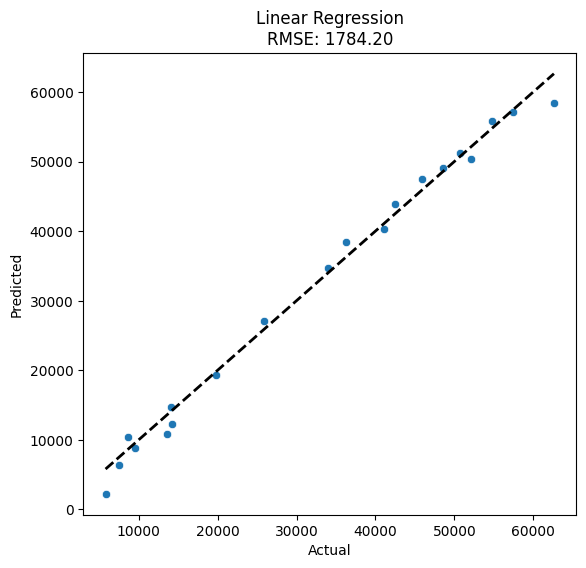

In [12]:
#linear plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression\nRMSE: {:.2f}'.format(rmse_linear))

In [13]:
#randomforest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 3569.6972970358424


c:\Users\eskim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


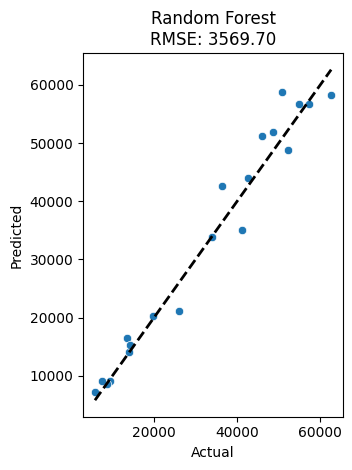

In [14]:
#random forest plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest\nRMSE: {:.2f}'.format(rmse_rf))

plt.tight_layout()
plt.show()

In [16]:
#saving the forest
import joblib
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [38]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# sample
user_input = {
    'Income ($)': 0,
    'Monthly Expenses ($)':0,
    'Dependents': 0,
    'Job Stability (1-10)': 0,
    'Lifestyle Cost (1-10)': 0
}

# Converting (assuming dict)
user_df = pd.DataFrame([user_input])

# Make a prediction
predicted_emergency_fund = loaded_model.predict(user_df)
print(f"Predicted Recommended Emergency Fund: ${predicted_emergency_fund[0]:,.2f}")

Predicted Recommended Emergency Fund: $32,479.94


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)

print(f'Best Random Forest RMSE: {rmse_best_rf}')
print(f'Best Parameters: {best_params}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Random Forest RMSE: 3642.5203459221675
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


c:\Users\eskim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validate Linear Regression
linear_model = LinearRegression()
cv_rmse_linear = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()

# Cross-validate Random Forest with best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
cv_rmse_rf = -cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error').mean()

print(f'Cross-validated Linear Regression RMSE: {cv_rmse_linear}')
print(f'Cross-validated Random Forest RMSE: {cv_rmse_rf}')


Cross-validated Linear Regression RMSE: 2744555.435401545
Cross-validated Random Forest RMSE: 12419025.859418705


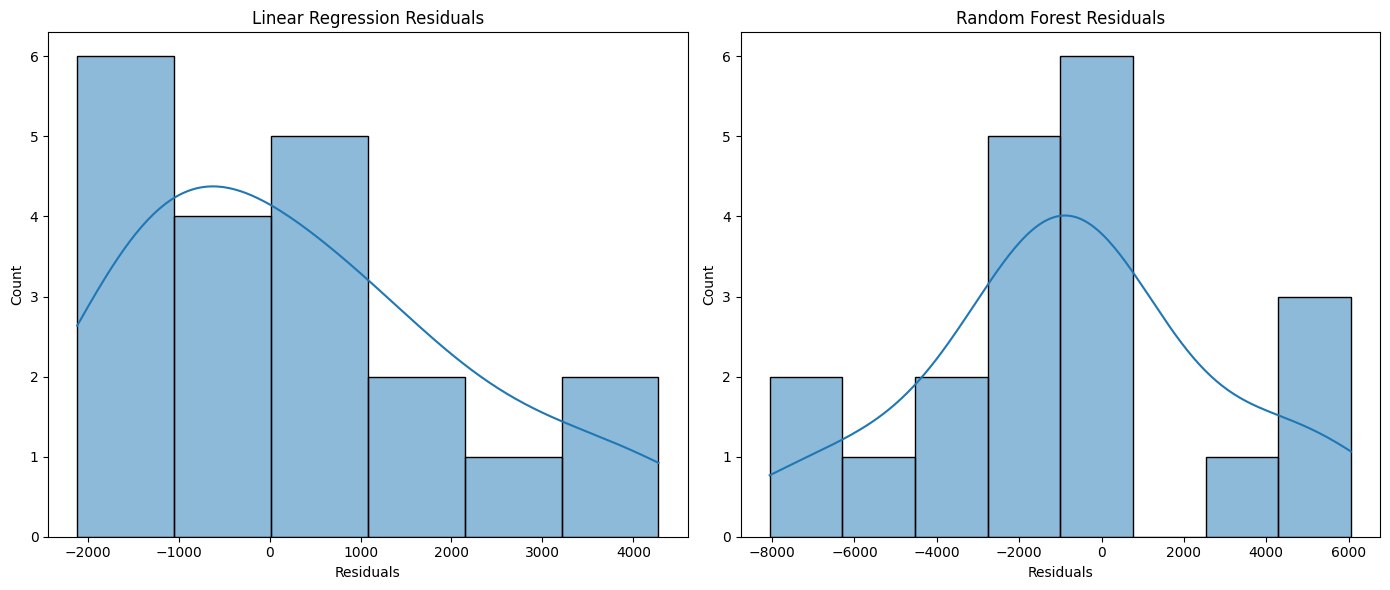

In [ ]:
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.histplot(y_test - y_pred_linear, kde=True)
plt.xlabel('Residuals')
plt.title('Linear Regression Residuals')

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred_rf, kde=True)
plt.xlabel('Residuals')
plt.title('Random Forest Residuals')

plt.tight_layout()
plt.show()
